<a href="https://colab.research.google.com/github/JavierElizondo1/Coder-Data-Science2/blob/main/Analisis%20de%20poblacion%20mundial%20-%20Javier%20Elizondo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                                         **Análisis de población mundial**

El estudio del crecimiento de la población mundial es un área crítica para comprender las dinámicas demográficas y sus implicaciones globales en aspectos económicos, sociales y ambientales.

Este dataset ofrece una visión detallada de la evolución poblacional global desde el siglo XX, desglosando el crecimiento por regiones y países, con un enfoque en las últimas décadas.

# **Motivación**
El crecimiento poblacional ha sido uno de los motores principales del cambio global, afectando la distribución de los recursos, el desarrollo económico, la migración y las políticas públicas.

Con el acelerado aumento en ciertas regiones, junto con la estabilización o declive en otras, este análisis es fundamental para prever los desafíos futuros relacionados con la sostenibilidad, la urbanización, la seguridad alimentaria y el cambio climático.

# **Audiencia**
Este dataset está dirigido a una audiencia diversa, que incluye:

* **Investigadores y demógrafos** interesados en analizar patrones y tendencias
poblacionales a nivel global y regional.


* **Economistas y planificadores** urbanos que necesitan datos para evaluar el impacto del crecimiento poblacional sobre el desarrollo económico y la infraestructura.


* **Políticos y responsables de políticas públicas**, para quienes esta información es clave en la formulación de estrategias de sostenibilidad, educación, y sanidad.


* **ONGs y organizaciones internacionales** que trabajan en áreas de desarrollo global, medioambiente y planificación a largo plazo.


* **Estudiantes y académicos** que buscan una base sólida de datos para realizar estudios y proyectos relacionados con la dinámica poblacional.


Este recurso es esencial para aquellos que buscan comprender cómo la evolución de la población global afecta el futuro de las sociedades y su interacción con el entorno global.

# Importar librerias

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)

import os
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

# Acerca del dataset

- **Rank:** Clasificación por población  
- **CCA3:** Código de 3 dígitos del país/territorios  
- **Country/territory:** Nombre del país/territorios  
- **Capital:** Nombre de la capital  
- **Continent:** Nombre del continente  
- **2022 population:** Población del país/territorios en el año 2022  
- **2020 population:** Población del país/territorios en el año 2020  
- **Cre.2020VS1970:** Crecimiento poblacional entre 2 decadas
- **2015 population:** Población del país/territorios en el año 2015  
- **2010 population:** Población del país/territorios en el año 2010
- **Cre.2010VS2000:** Crecimiento poblacional entre 2 decadas  
- **2000 population:** Población del país/territorios en el año 2000
- **Cre.2000VS1990:** Crecimiento poblacional entre 2 decadas   
- **1990 population:** Población del país/territorios en el año 1990
- **Cre.1990VS1980:** Crecimiento poblacional entre 2 decadas    
- **1980 population:** Población del país/territorios en el año 1980  
- **Cre.1980VS1970:** Crecimiento poblacional entre 2 decadas    
- **1990 population:** Población del país/territorios en el año 1970  
- **Área (km²):** Tamaño del área del país/territorios en kilómetros cuadrados  
- **Density (per km²):** Densidad de población por kilómetro cuadrado  
- **Growth Rate:** Tasa de crecimiento poblacional por país/territorios  
- **World Population Percentage:** Porcentaje de la población de cada país/territorio

In [113]:
df = pd.read_csv("/content/world_populationWDELTASV1.csv")

# Exploración basica

In [114]:
df.shape


(234, 25)

In [115]:
df.head(15)


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,Cre.2020VS1970,Cre.2020VS2010,Cre.2020VS2015,...,2000vs1990,1990 Population,1990vs1980,1980 Population,1980vs1970,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,3.624322,1.382500,1.154613,...,1.827336,10694796,0.856500,12486631,1.161226,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,1.233196,0.984022,0.994577,...,0.965693,3295066,1.120142,2941651,1.265373,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,3.149604,1.211826,1.098842,...,1.205993,25518074,1.361735,18739378,1.358328,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,1.705965,0.842112,0.899178,...,1.217742,47818,1.454053,32886,1.214626,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,3.912387,1.086425,1.082987,...,1.233867,53569,1.504282,35611,1.793102,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,5.543972,1.430758,1.188453,...,1.385964,11828638,1.419997,8330047,1.381503,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,America,15857,15585,2.480503,1.183192,1.072978,...,1.328403,8316,1.267683,6560,1.044087,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,America,93763,92664,1.436295,1.081323,1.030275,...,1.185179,63328,0.975959,64888,1.005766,64516,442,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,America,45510318,45036032,1.888873,1.095764,1.041125,...,1.135828,32637657,1.164599,28024803,1.175399,23842803,2780400,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,1.107021,0.952250,0.974645,...,0.890901,3556539,1.134418,3135123,1.237039,2534377,29743,93.4831,0.9962,0.03


In [116]:
df.dtypes

,0
Rank,int64
CCA3,object
Country/Territory,object
Capital,object
Continent,object
2022 Population,int64
2020 Population,int64
Cre.2020VS1970,float64
Cre.2020VS2010,float64
Cre.2020VS2015,float64


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   Cre.2020VS1970               234 non-null    float64
 8   Cre.2020VS2010               234 non-null    float64
 9   Cre.2020VS2015               234 non-null    float64
 10  2015 Population              234 non-null    int64  
 11  Cre.2015vs2010               234 non-null    float64
 12  2010 Population              234 non-null    int64  
 13  2010vs2000          

In [118]:
df.describe().T.sort_values(ascending=0, by="mean").style.background_gradient(cmap = "BuGn")

,count,mean,std,min,25%,50%,75%,max
2022 Population,234.000000,34074414.709402,136766424.804763,510.000000,419738.500000,5559944.500000,22476504.750000,1425887337.000000
2020 Population,234.000000,33501070.952991,135589876.924439,520.000000,415284.500000,5493074.500000,21447979.500000,1424929781.000000
2015 Population,234.000000,31729956.243590,130404992.751760,564.000000,404676.000000,5307400.000000,19730853.750000,1393715448.000000
2010 Population,234.000000,29845235.034188,124218487.632998,596.000000,393149.000000,4942770.500000,19159567.500000,1348191368.000000
2000 Population,234.000000,26269468.816239,111698206.719070,651.000000,327242.000000,4292907.000000,15762301.000000,1264099069.000000
1990 Population,234.000000,22710220.790598,97832173.346751,700.000000,264115.750000,3825409.500000,11869231.000000,1153704252.000000
1980 Population,234.000000,18984616.970085,81785186.084201,733.000000,229614.250000,3141145.500000,9826053.750000,982372466.000000
1970 Population,234.000000,15786908.807692,67795091.643236,752.000000,155997.000000,2604830.000000,8817329.000000,822534450.000000
Area (km²),234.000000,581449.384615,1761840.864063,1.000000,2650.000000,81199.500000,430425.750000,17098242.000000
Density (per km²),234.000000,452.127044,2066.121904,0.026100,38.417875,95.346750,238.933250,23172.266700


In [119]:
df.nunique()

,0
Rank,234
CCA3,234
Country/Territory,234
Capital,234
Continent,5
2022 Population,234
2020 Population,234
Cre.2020VS1970,234
Cre.2020VS2010,234
Cre.2020VS2015,234


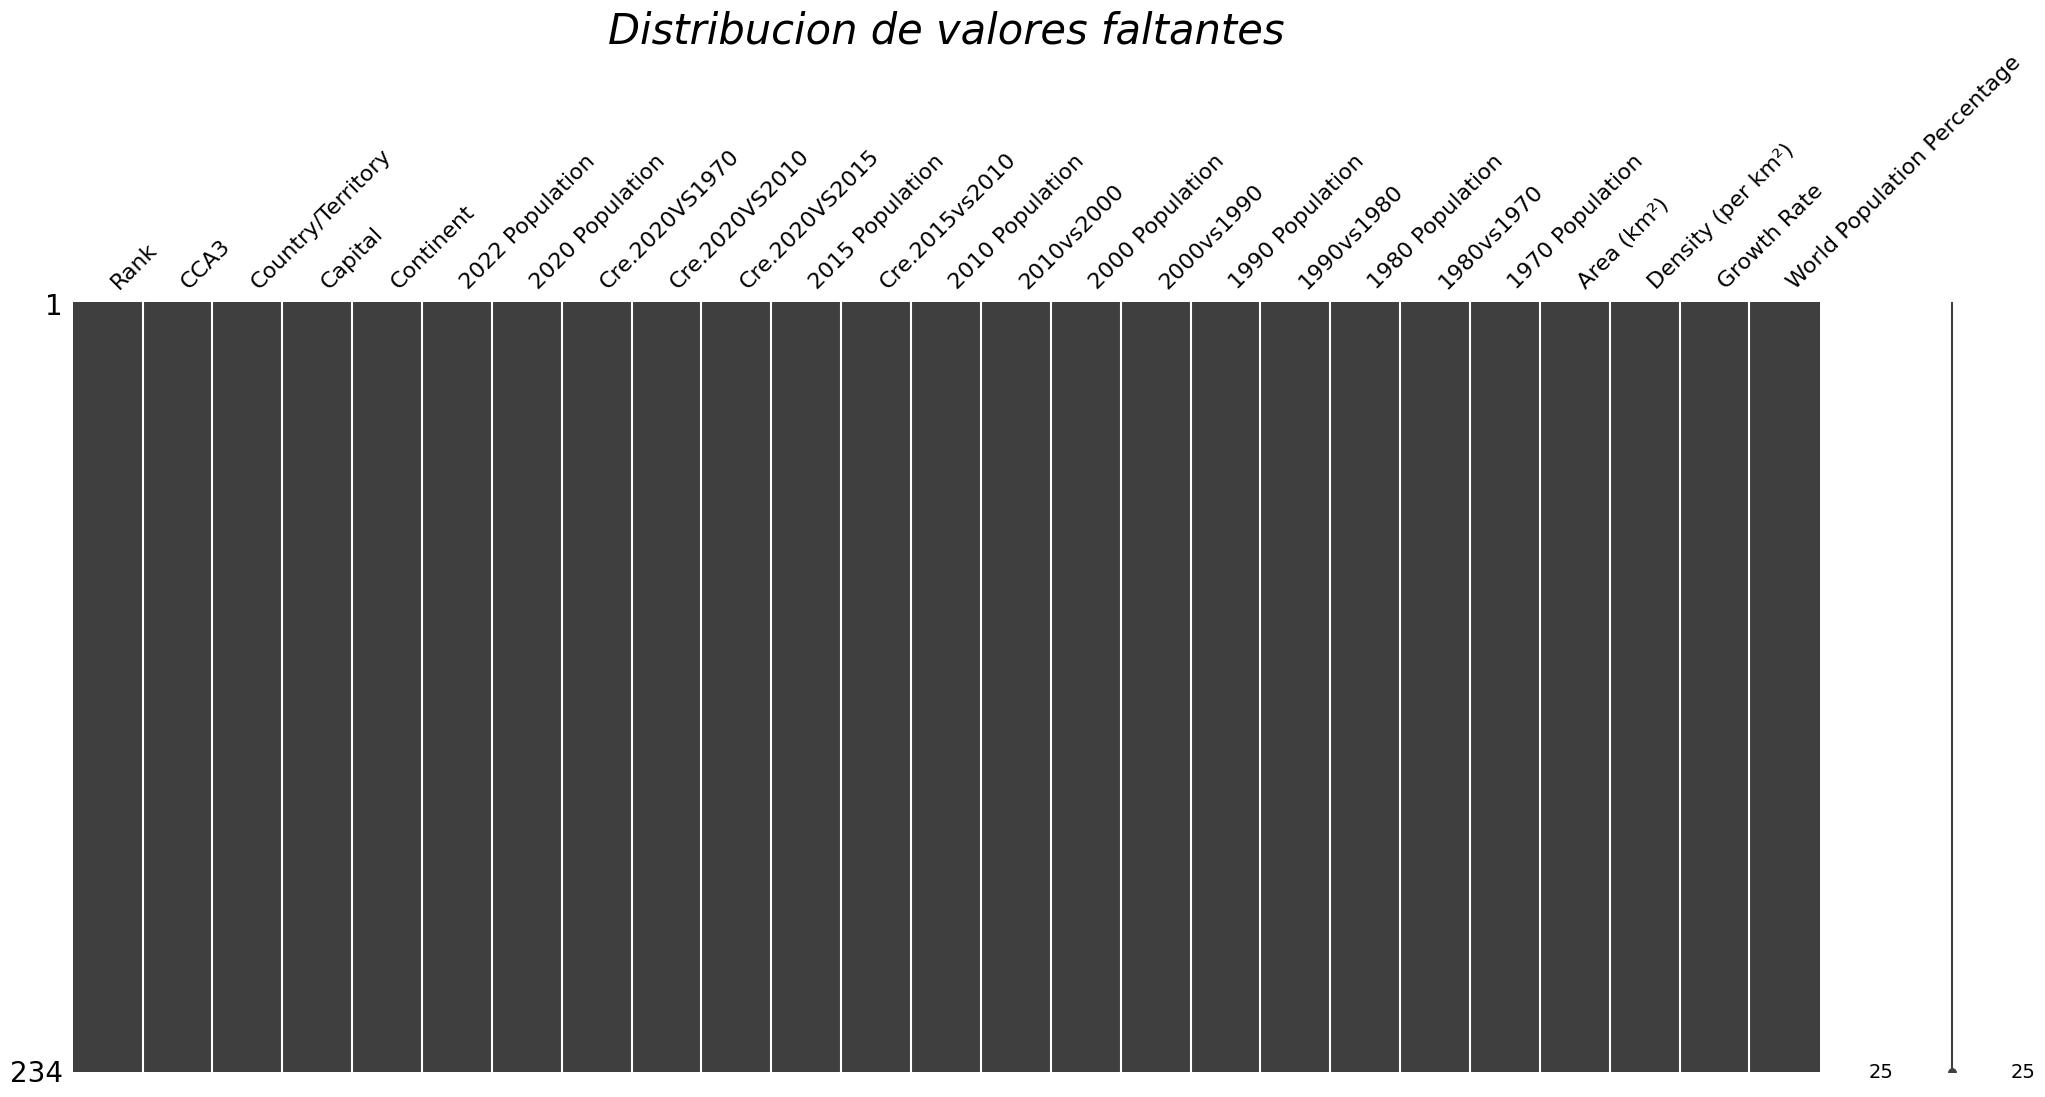

In [120]:
msno.matrix(df)
plt.title('Distribucion de valores faltantes',fontsize=30, fontstyle= 'oblique')
plt.show()

## Hay un total de 234 paises y 5 continentes en este dataset

##    Hay un total de 3978 observaciones

##    No hay datos faltantes en este dataset



In [121]:
fig1 = px.choropleth(df, locations='CCA3', color='Growth Rate', hover_name='Country/Territory')
fig1.update_layout(title_text='Población mundial', title_x=0.5)
fig1.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))
fig1.update_layout(legend_title_text='Tasa de crecimiento poblacional')
fig1.update_layout(legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
fig1.update_layout(margin=dict(l=0, r=0, t=0, b=0))
fig1.update_layout(height=600)
fig1.update_layout(width=1000)
fig1.update_layout(title_font=dict(size=24))
fig1.update_layout(legend_font=dict(size=16))
fig1.update_layout(legend_itemclick=False)
fig1.update_layout(legend_itemdoubleclick=False)
fig1.update_layout(legend_itemsizing='constant')
fig1.update_layout(legend_itemwidth=30)
fig1.show()

In [122]:
top_most_population = df.groupby(by = 'Country/Territory')['2022 Population'].sum().sort_values(ascending=False).head(10)

fig=px.bar(x=top_most_population.index,
          y=top_most_population.values,
          color=top_most_population.index,
          color_discrete_sequence=px.colors.sequential.PuBuGn,
          text=top_most_population.values,
          title="Top 10 Countries with the most population",
          template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

In [123]:
# Filter out only numeric columns
numeric_features = df.select_dtypes(include='number').columns

# Group by 'Continent' and calculate the mean of numeric features
continent = df.groupby('Continent')[numeric_features].mean()

# Sort the resulting DataFrame by '2022 Population'
continent.sort_values(by='2022 Population', inplace=True)

In [124]:
population_features = ['2022 Population','2020 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']

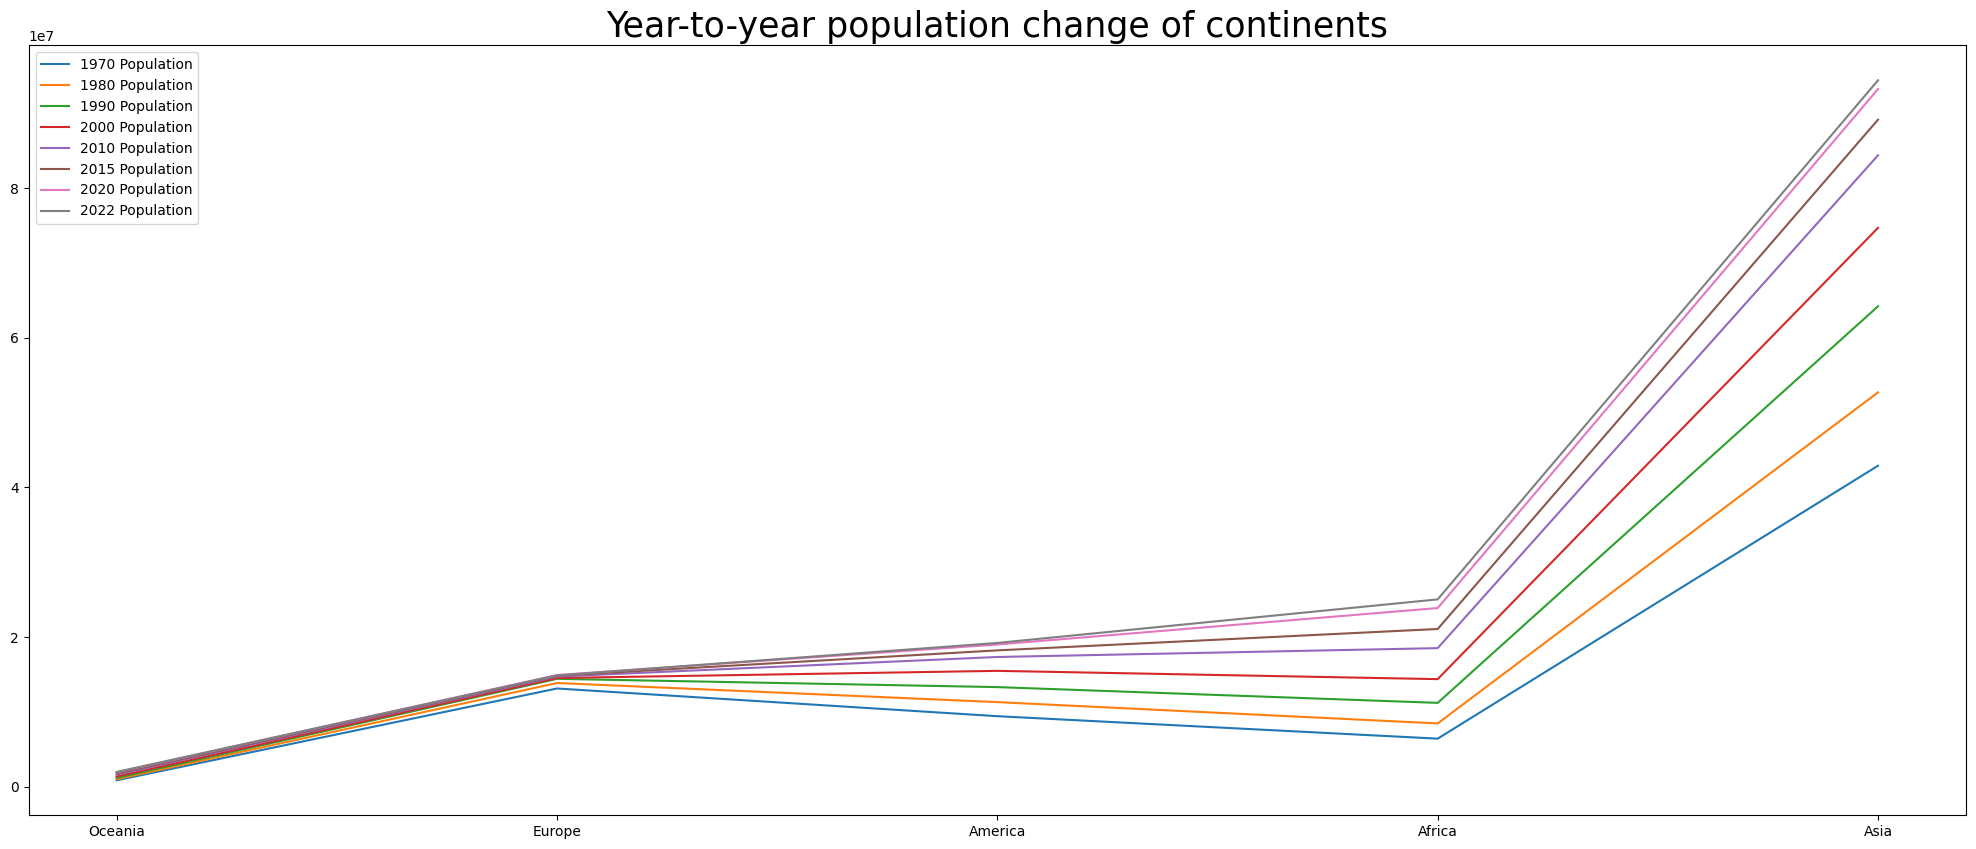

In [125]:
population_features.reverse()
plt.figure(figsize=(25,10))
for feature in population_features:
    plt.plot(continent[feature],label = feature)
plt.legend()
plt.title('Year-to-year population change of continents', size=25);
plt.show();

## - La población mundial está creciendo año tras año (sin señales de disminución). Según las estimaciones actuales de crecimiento poblacional, la Tierra estará **superpoblada** para 2050 o antes.

## - **China e India** son los dos países con la mayor población del mundo (cada uno tiene más de 1.4 mil millones de personas).

## - **Ucrania** tiene la tasa de crecimiento poblacional más baja (0.912), mientras que **Moldavia** (el país vecino de Ucrania) tiene la tasa de crecimiento más alta (1.0691).

## - **Macao** es el país más densamente poblado del mundo (23,172.27 por km²), mientras que su área es de solo 20 km².

## - **El continente africano** tiene la tasa de crecimiento más alta en comparación con otros continentes.